In [1]:
import numpy as np
from scipy.stats import multivariate_normal

Visualizing 10 random mfccs for 10 different digits

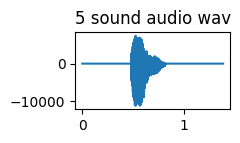

(12, 70)


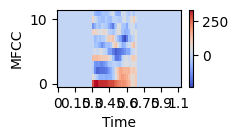

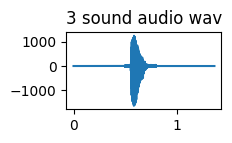

(12, 70)


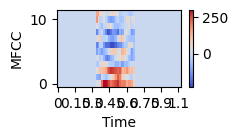

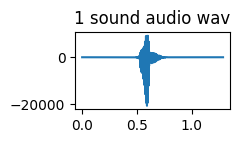

(12, 70)


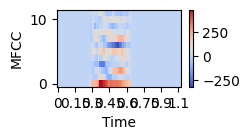

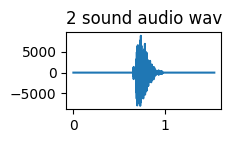

(12, 70)


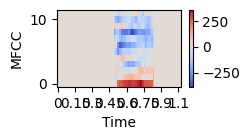

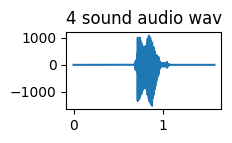

(12, 70)


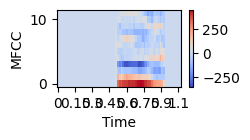

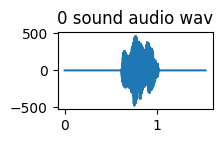

(12, 70)


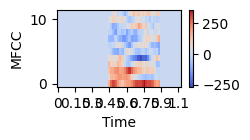

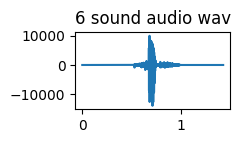

(12, 70)


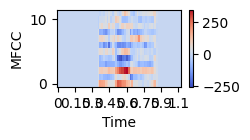

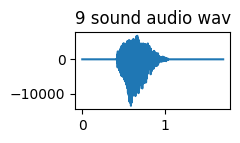

(12, 70)


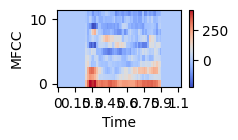

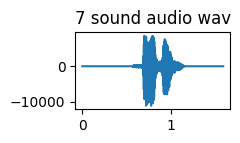

(12, 70)


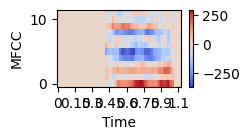

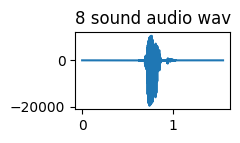

(12, 70)


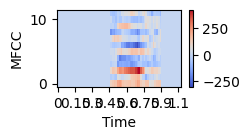

In [2]:
import numpy as np
import scipy.io.wavfile as sci_wav
from matplotlib import pyplot as plt

import os
import librosa
import librosa.display as libdisplay


def visualize_mfcc(y_spec: np.array, parameters: dict, title: str = ""):
    plt.figure(figsize=(2, 1))
    plt.title(title)
    libdisplay.specshow(y_spec, y_axis='frames', sr=parameters['fs'], x_axis='time', hop_length=parameters['window_step'])
    plt.colorbar()
    plt.ylabel('MFCC')
    plt.show(block=False)



def get_mfcc_of_signal(signal: np.array, parameters: dict):
    """
    Get MFCC coefficient form librosa.

    :param signal: input signal
    :param parameters: Params used for MFCC extraction
    :return: MFCC from librosa and implementation
    """

    n_fft = parameters['n_fft']
    window_length = parameters['window_length']
    window_step = parameters['window_step']
    n_mels = 40
    n_mfcc = 13
    # Use librosa for MFCC extraction
    signal_mfcc_lib = librosa.feature.mfcc(sr=fs, y=signal, n_mfcc=n_mfcc, n_mels=n_mels, win_length=window_length,
                                           hop_length=window_step, lifter=22)[1:n_mfcc, :]


    return signal_mfcc_lib


if __name__ == '__main__':
    audio_dir = "/Users/reyhane/Downloads/recordings/"



    mfcc_data = []  # List to store MFCC features of all audio files
    digit_labels = []
    ten_data = []
    for filename in os.listdir(audio_dir):
        if filename.endswith(".wav"):
            # read sound data
            file_path = os.path.join(audio_dir, filename)
            fs, y = sci_wav.read(file_path)
            # convert signal to double
            y = 1.0 * y
            t = np.linspace(0, y.shape[0] / fs, y.shape[0])


            n_fft = 512
            params = {
                'fs': fs,
                'n_fft': n_fft,
                'window_length': n_fft,
                'window_step': int(n_fft/3),
            }
            y_mfcc_lib = get_mfcc_of_signal(y, params)
            # visualize_mfcc(y_mfcc_lib, params)
            # plt.show()
            mfcc_data.append(y_mfcc_lib)

        digit_label = int(filename.split("_")[0])
        
        if digit_label not in digit_labels:
            digit_labels.append(digit_label)
            ten_data.append(filename)
    
    i = 0
    for data in ten_data:
        
            file_path = os.path.join(audio_dir, data)
            fs, y = sci_wav.read(file_path)
            # convert signal to double
            y = 1.0 * y
            t = np.linspace(0, y.shape[0] / fs, y.shape[0])
            digit = digit_labels[i]
            # visualize signal
            plt.figure(figsize=(2, 1))
            plt.title(f"{digit} sound audio wav")
            plt.plot(t, y)
            plt.show(block=False)

            n_fft = 512
            params = {
                'fs': fs,
                'n_fft': n_fft,
                'window_length': n_fft,
                'window_step': int(n_fft/3),
            }
            mfcc_lib = get_mfcc_of_signal(y, params)
            mfcc_lib = mfcc_lib[:,10:80]
            print(mfcc_lib.shape)
            visualize_mfcc(mfcc_lib, params)
            plt.show()
            i += 1
    

Removing silence out of the sounds and saving them in a new folder

In [5]:
from pydub.silence import split_on_silence
from pydub import AudioSegment

def remove_silence(input_path, output_path, min_silence_len = 50, silence_thresh = -40):
    audio = AudioSegment.from_mp3(input_path)

    chunks = split_on_silence(audio, min_silence_len = min_silence_len, silence_thresh = silence_thresh)
    output = AudioSegment.empty()
    for chunk in chunks:
        output += chunk
    
    output.export(output_path, format = "wav")

audio_dir = "/Users/reyhane/Downloads/recordings/"
output_dir = "/Users/reyhane/Desktop/cutrecordings/"


for filename in os.listdir(audio_dir):
        if filename.endswith(".wav"):
            # read sound data
            output_path = os.path.join(output_dir, filename)
            file_path = os.path.join(audio_dir, filename)
            remove_silence(file_path, output_path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Extracting mfccs out of the audio files which have been edited(without silence)

In [4]:
import os
from collections import defaultdict
import numpy as np
import scipy.io.wavfile as sci_wav
import librosa
from python_speech_features import mfcc
# Function to parse the filename and extract the digit label
def get_label(filename):
    return int(filename.split('_')[0])

# Function to parse the filename and extract the digit label
def get_speaker(filename):
    return str(filename.split('_')[1])

def get_mfcc_of_signal(signal: np.array, parameters: dict):
    """
    Get MFCC coefficient form librosa.

    :param signal: input signal
    :param parameters: Params used for MFCC extraction
    :return: MFCC from librosa and implementation
    """

    n_fft = parameters['n_fft']
    window_length = parameters['window_length']
    window_step = parameters['window_step']
    n_mels = 40
    n_mfcc = 13
    # Use librosa for MFCC extraction
    signal_mfcc_lib = librosa.feature.mfcc(sr=fs, y=signal, n_mfcc=n_mfcc, n_mels=n_mels, win_length=window_length,
                                        hop_length=window_step, lifter=22, norm = 'ortho')[1:n_mfcc, :]
   

    return signal_mfcc_lib






audio_dir = "/Users/reyhane/Desktop/cutrecordings/"

# Create a dictionary to store MFCC features for each digit label
mfcc_by_digit = defaultdict(list)
mfcc_by_speaker = defaultdict(list)
for filename in os.listdir(audio_dir):
        if filename.endswith(".wav"):
            # read sound data
            file_path = os.path.join(audio_dir, filename)
            fs, y = sci_wav.read(file_path)
            # convert signal to double
            y = 1.0 * y
            t = np.linspace(0, y.shape[0] / fs, y.shape[0])

            n_fft = 1024
            params = {
                'fs': fs,
                'n_fft': n_fft,
                'window_length': n_fft,
                'window_step': int(n_fft/3),
            }
            

            y_mfcc_lib = get_mfcc_of_signal(y, params)
            
            label = get_label(filename)
            speaker = get_speaker(filename)
            
            mfcc_by_digit[label].append(y_mfcc_lib)
            mfcc_by_speaker[speaker].append(y_mfcc_lib)
            

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


Normalizing mfccs

In [5]:

from sklearn.model_selection import train_test_split
from collections import defaultdict
from speechpy.processing import cmvn
def normalise(array):
    min_val = 0
    max_val = 1
    norm_array = (array - array.min()) / (array.max() - array.min())
    norm_array = norm_array * (max_val - min_val) + min_val
    return norm_array

def cmvnfun(mfcc):
    mfcc = cmvn(mfcc,variance_normalization=True)
    return mfcc

# Create dictionaries to store train and test MFCC features for each digit label
train_mfcc_by_digit = defaultdict(list)
test_mfcc_by_digit = defaultdict(list)

# Split MFCC features for each digit into train and test sets
for label, mfcc_list in mfcc_by_digit.items():
    train_mfcc, test_mfcc = train_test_split(mfcc_list, test_size=0.2, random_state=42)
    
    # Normalize train MFCCs
    train_mfcc = [normalise(mfcc) for mfcc in train_mfcc]
    train_mfcc_by_digit[label].extend(train_mfcc)
    
    # Normalize test MFCCs
    test_mfcc = [normalise(mfcc) for mfcc in test_mfcc]

    test_mfcc_by_digit[label].extend(test_mfcc)



/var/folders/hr/plrl8j0s23348y6x_klwwlr00000gn/T/ipykernel_29356/608487088.py:7: RuntimeWarning: invalid value encountered in divide
  norm_array = (array - array.min()) / (array.max() - array.min())


See if there is an mfcc which has less than 10 frames? Remove that

In [58]:
filtered_train_mfcc_by_digit = defaultdict(list)
filtered_test_mfcc_by_digit = defaultdict(list)

for digit, mfcc_list in train_mfcc_by_digit.items():
    for mfcc in mfcc_list:
        if mfcc.shape[1] >= 10:  # Check shape and number of frames
            filtered_train_mfcc_by_digit[digit].append(mfcc)

# Now, filtered_train_mfcc_by_digit contains only MFCCs with at least 10 frames and not in shape (12, 1)
filtered_test_mfcc_by_digit = defaultdict(list)

for digit, mfcc_list in test_mfcc_by_digit.items():
    for mfcc in mfcc_list:
        if mfcc.shape[1] >= 10:  # Check shape and number of frames
            filtered_test_mfcc_by_digit[digit].append(mfcc)

# Now, filtered_test_mfcc_by_digit contains only MFCCs with at least 10 frames and not in shape (12, 1)

Make all the mfccs homogeneous in the second dimension

In [59]:
hetro_filtered_test_mfcc_by_digit = defaultdict(list)
hetro_filtered_train_mfcc_by_digit = defaultdict(list)

min_frames_by_digit = {}  # Dictionary to store the minimum number of frames for each digit

# Find the minimum number of frames for each digit
for digit, mfcc_list in filtered_train_mfcc_by_digit.items():
    min_frames = min(mfcc.shape[1] for mfcc in mfcc_list)
    min_frames_by_digit[digit] = min_frames
    # print(f"maximum frame: {min_frames}")

# Cut or truncate each MFCC to have the same shape as the MFCC with the minimum number of frames
for digit, mfcc_list in filtered_train_mfcc_by_digit.items():
    min_frames = min_frames_by_digit[digit]
    for i, mfcc in enumerate(mfcc_list):
        hetro_filtered_train_mfcc_by_digit[digit].append(mfcc)
        filtered_train_mfcc_by_digit[digit][i] = mfcc[:, :min_frames]


# Find the minimum number of frames for each digit
for digit, mfcc_list in filtered_test_mfcc_by_digit.items():
    min_frames = min(mfcc.shape[1] for mfcc in mfcc_list)
    min_frames_by_digit[digit] = min_frames
    # print(f"maximum frame: {min_frames}")

# Cut or truncate each MFCC to have the same shape as the MFCC with the minimum number of frames
for digit, mfcc_list in filtered_test_mfcc_by_digit.items():
    min_frames = min_frames_by_digit[digit]
    for i, mfcc in enumerate(mfcc_list):
        hetro_filtered_test_mfcc_by_digit[digit].append(mfcc)
        filtered_test_mfcc_by_digit[digit][i] = mfcc[:, :min_frames]




Use ready library to train hmm model

In [60]:
from hmmlearn import hmm
from collections import defaultdict
import numpy as np

# Assuming you have filtered_train_mfcc_by_digit containing filtered MFCCs for each digit

# Define the number of states for the HMM models
num_states = 3 # You can adjust this as needed

# Dictionary to store trained HMM models for each digit
hmm_models_library = {}

# Train HMM models for each digit
for digit, mfcc_list in filtered_train_mfcc_by_digit.items():
    # Concatenate filtered MFCCs for this digit into a single array
    digit_mfccs = np.concatenate(mfcc_list, axis=1)  # Concatenate along the second axis (frames)
    
    # Create and train HMM model
    model = hmm.GaussianHMM(n_components=num_states)
    model.fit(digit_mfccs.T)  # Transpose the array to match hmmlearn's convention
    
    # Store the trained model
    hmm_models_library[digit] = model


In [61]:
correct_predictions = 0
total_predictions = 0

# Iterate through each test sample
for true_digit, mfcc_list in filtered_test_mfcc_by_digit.items():
    for mfcc in mfcc_list:
        # Compute log-likelihood under each trained HMM model
        likelihoods = {digit: model.score(mfcc.T) for digit, model in hmm_models_library.items()}
        
        # Assign the sample to the digit with the highest log-likelihood
        predicted_digit = max(likelihoods, key=likelihoods.get)
        
        # Check if prediction is correct
        if predicted_digit == true_digit:
            correct_predictions += 1
        total_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)

Accuracy: 0.8414376321353065


Confusion matrix for target digit

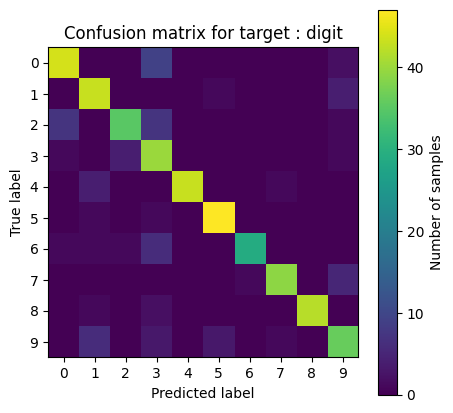

In [62]:
# Initialize empty confusion matrix
conf_matrix = np.zeros((len(filtered_test_mfcc_by_digit), len(filtered_test_mfcc_by_digit)))

for true_digit, mfcc_list in filtered_test_mfcc_by_digit.items():
    for mfcc in mfcc_list:
        # Compute log-likelihood under each trained HMM model
        likelihoods = {digit: model.score(mfcc.T) for digit, model in hmm_models_library.items()}
        
        # Assign the sample to the digit with the highest log-likelihood
        predicted_digit = max(likelihoods, key=likelihoods.get)
        # Update confusion matrix
        conf_matrix[int(true_digit), int(predicted_digit)] += 1

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of samples')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for target : digit')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.grid(False)
plt.show()

Different scores for evaluating data

In [63]:
# Calculate precision, recall, and F1-score
num_classes = len(conf_matrix)
precision = np.zeros(num_classes)
recall = np.zeros(num_classes)
f1_score = np.zeros(num_classes)

for i in range(num_classes):
    true_positive = conf_matrix[i, i]
    false_positive = np.sum(conf_matrix[:, i]) - true_positive
    false_negative = np.sum(conf_matrix[i, :]) - true_positive
    
    # Calculate precision
    precision[i] = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    
    # Calculate recall
    recall[i] = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    
    # Calculate F1-score
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

# Compute average precision, recall, and F1-score
average_precision = np.mean(precision)
average_recall = np.mean(recall)
average_f1_score = np.mean(f1_score)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1_score)


# Display the table
print("Class\tPrecision\tRecall\tF1-score")
for i in range(num_classes):
    print(f"{i}\t{precision[i]:.4f}\t\t{recall[i]:.4f}\t{f1_score[i]:.4f}")


Average Precision: 0.8635429800083863
Average Recall: 0.8418267329815222
Average F1-score: 0.8466454040122493
Class	Precision	Recall	F1-score
0	0.8302		0.8000	0.8148
1	0.7679		0.8958	0.8269
2	0.8750		0.7000	0.7778
3	0.5882		0.8696	0.7018
4	1.0000		0.8958	0.9451
5	0.9216		0.9592	0.9400
6	0.9667		0.7632	0.8529
7	0.9512		0.8667	0.9070
8	1.0000		0.9333	0.9655
9	0.7347		0.7347	0.7347


change target to speaker

In [6]:


# Create dictionaries to store train and test MFCC features for each digit label
train_mfcc_by_speaker = defaultdict(list)
test_mfcc_by_speaker = defaultdict(list)

# Split MFCC features for each digit into train and test sets
for speaker, mfcc_list in mfcc_by_speaker.items():
    train_mfcc_speaker, test_mfcc_speaker = train_test_split(mfcc_list, test_size=0.2, random_state=42)
    
    # Normalize train MFCCs
    train_mfcc_speaker = [normalise(mfcc) for mfcc in train_mfcc_speaker]
    train_mfcc_by_speaker[speaker].extend(train_mfcc_speaker)
    
    # Normalize test MFCCs
    test_mfcc_speaker = [normalise(mfcc) for mfcc in test_mfcc_speaker]
    test_mfcc_by_speaker[speaker].extend(test_mfcc_speaker)

/var/folders/hr/plrl8j0s23348y6x_klwwlr00000gn/T/ipykernel_29356/608487088.py:7: RuntimeWarning: invalid value encountered in divide
  norm_array = (array - array.min()) / (array.max() - array.min())


In [7]:


filtered_train_mfcc_by_speaker = defaultdict(list)
filtered_test_mfcc_by_speaker = defaultdict(list)

for speaker, mfcc_list in train_mfcc_by_speaker.items():
    for mfcc in mfcc_list:
        if mfcc.shape[1] >= 10:  # Check shape and number of frames
            filtered_train_mfcc_by_speaker[speaker].append(mfcc)

# Now, filtered_train_mfcc_by_digit contains only MFCCs with at least 10 frames and not in shape (12, 1)
filtered_test_mfcc_by_speaker = defaultdict(list)

for speaker, mfcc_list in test_mfcc_by_speaker.items():
    for mfcc in mfcc_list:
        if mfcc.shape[1] >= 10:  # Check shape and number of frames
            filtered_test_mfcc_by_speaker[speaker].append(mfcc)

In [8]:
hetro_filtered_test_mfcc_by_speaker = defaultdict(list)
hetro_filtered_train_mfcc_by_speaker = defaultdict(list)

min_frames_by_speaker = {}  # Dictionary to store the minimum number of frames for each digit

# Find the minimum number of frames for each digit
for speaker, mfcc_list in filtered_train_mfcc_by_speaker.items():
    min_frames = min(mfcc.shape[1] for mfcc in mfcc_list)
    min_frames_by_speaker[speaker] = min_frames
    # print(f"maximum frame: {min_frames}")

# Cut or truncate each MFCC to have the same shape as the MFCC with the minimum number of frames
for speaker, mfcc_list in filtered_train_mfcc_by_speaker.items():
    min_frames = min_frames_by_speaker[speaker]
    for i, mfcc in enumerate(mfcc_list):
        hetro_filtered_train_mfcc_by_speaker[speaker].append(mfcc)
        filtered_train_mfcc_by_speaker[speaker][i] = mfcc[:, :min_frames]


# Find the minimum number of frames for each digit
for speaker, mfcc_list in filtered_test_mfcc_by_speaker.items():
    min_frames = min(mfcc.shape[1] for mfcc in mfcc_list)
    min_frames_by_speaker[speaker] = min_frames
    # print(f"maximum frame: {min_frames}")

# Cut or truncate each MFCC to have the same shape as the MFCC with the minimum number of frames
for speaker, mfcc_list in filtered_test_mfcc_by_speaker.items():
    min_frames = min_frames_by_speaker[speaker]
    for i, mfcc in enumerate(mfcc_list):
        hetro_filtered_test_mfcc_by_speaker[speaker].append(mfcc)
        filtered_test_mfcc_by_speaker[speaker][i] = mfcc[:, :min_frames]

In [9]:
from hmmlearn import hmm
from collections import defaultdict
import numpy as np

# Assuming you have filtered_train_mfcc_by_speaker containing filtered MFCCs for each speaker

# Define the number of states for the HMM models
num_states = 2 # You can adjust this as needed

# Dictionary to store trained HMM models for each speaker
hmm_models_library_s = {}

# Train HMM models for each speaker
for speaker, mfcc_list in filtered_train_mfcc_by_speaker.items():
    # Concatenate filtered MFCCs for this speaker into a single array
    speaker_mfccs = np.concatenate(mfcc_list, axis=1)  # Concatenate along the second axis (frames)
    
    # Create and train HMM model
    model = hmm.GaussianHMM(n_components=num_states)
    model.fit(speaker_mfccs.T)  # Transpose the array to match hmmlearn's convention
    
    # Store the trained model
    hmm_models_library_s[speaker] = model

In [10]:
correct_predictions = 0
total_predictions = 0

# Iterate through each test sample
for true_speaker, mfcc_list in filtered_test_mfcc_by_speaker.items():
    for mfcc in mfcc_list:
        # Compute log-likelihood under each trained HMM model
        likelihoods = {speaker: model.score(mfcc.T) for speaker, model in hmm_models_library_s.items()}
        
        # Assign the sample to the speaker with the highest log-likelihood
        predicted_speaker = max(likelihoods, key=likelihoods.get)
        
        # Check if prediction is correct
        if predicted_speaker == true_speaker:
            correct_predictions += 1
        total_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)

Accuracy: 0.7606837606837606


evaluate your library data with speaker target

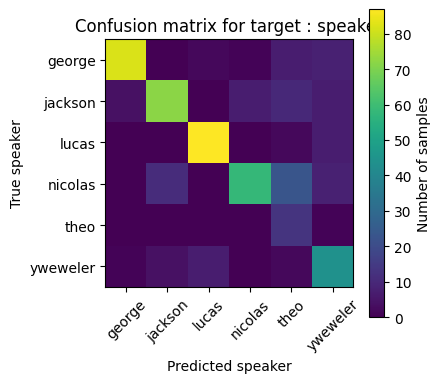

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define speaker names
names = ["george", "jackson", "lucas", "nicolas", "theo", "yweweler"]

# Initialize empty confusion matrix
conf_matrix_speaker = np.zeros((len(names), len(names)))

for true_speaker, mfcc_list in filtered_test_mfcc_by_speaker.items():
    for mfcc in mfcc_list:
        # Compute log-likelihood under each trained HMM model
        likelihoods = {speaker: model.score(mfcc.T) for speaker, model in hmm_models_library_s.items()}
        
        # Assign the sample to the speaker with the highest log-likelihood
        predicted_speaker = max(likelihoods, key=likelihoods.get)
        
        # Update confusion matrix
        conf_matrix_speaker[names.index(true_speaker), names.index(predicted_speaker)] += 1

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
plt.imshow(conf_matrix_speaker, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of samples')
plt.xlabel('Predicted speaker')
plt.ylabel('True speaker')
plt.title('Confusion matrix for target : speaker')
plt.xticks(np.arange(len(names)), names, rotation=45)
plt.yticks(np.arange(len(names)), names)
plt.grid(False)
plt.show()


In [12]:
# Calculate precision, recall, and F1-score
num_classes = len(conf_matrix_speaker)
precision = np.zeros(num_classes)
recall = np.zeros(num_classes)
f1_score = np.zeros(num_classes)

for i in range(num_classes):
    true_positive = conf_matrix_speaker[i, i]
    false_positive = np.sum(conf_matrix_speaker[:, i]) - true_positive
    false_negative = np.sum(conf_matrix_speaker[i, :]) - true_positive
    
    # Calculate precision
    precision[i] = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    
    # Calculate recall
    recall[i] = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    
    # Calculate F1-score
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

# Compute average precision, recall, and F1-score
average_precision = np.mean(precision)
average_recall = np.mean(recall)
average_f1_score = np.mean(f1_score)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1_score)



# Display the table with speaker names
print("Speaker\t\tPrecision\tRecall\tF1-score")
for i, speaker in enumerate(names):
    print(f"{speaker}\t\t{precision[i]:.4f}\t\t{recall[i]:.4f}\t{f1_score[i]:.4f}")


Average Precision: 0.7283149439036462
Average Recall: 0.7855736863711003
Average F1-score: 0.7133258871148733
Speaker		Precision	Recall	F1-score
george		0.9425		0.8200	0.8770
jackson		0.8276		0.7200	0.7701
lucas		0.9062		0.9062	0.9062
nicolas		0.8788		0.5800	0.6988
theo		0.2281		0.9286	0.3662
yweweler		0.5867		0.7586	0.6617
